In [3]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('./data/5000topsongs.csv')

In [8]:
df.head()

,id,title,artist,release_date,genres,user_score,rating_count,album_link
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings",https://www.albumoftheyear.org/album/29250-ken...
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings",https://www.albumoftheyear.org/album/3840-kend...
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings",https://www.albumoftheyear.org/album/363-radio...
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings",https://www.albumoftheyear.org/album/5600-stev...
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings",https://www.albumoftheyear.org/album/362-radio...


In [65]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')


In [70]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [83]:
mean_user_score = df.groupby(['year'])['user_score'].mean().reset_index().sort_values(by = ['user_score'], ascending = False)

In [79]:
mean_user_score

,year,user_score
6,1961.0,84.000000
4,1959.0,83.285714
16,1971.0,83.153846
10,1965.0,82.785714
42,1997.0,82.647887
14,1969.0,82.545455
17,1972.0,82.428571
18,1973.0,82.386364
21,1976.0,82.360000
43,1998.0,82.260274


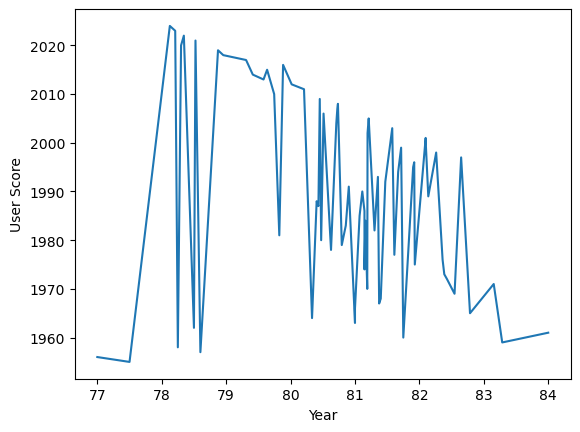

In [89]:
plt.plot(mean_user_score['user_score'],mean_user_score['year'])
plt.xlabel('Year')
plt.ylabel('User Score')
plt.show()

In [71]:
df.describe()

,id,release_date,user_score,year,month
count,5000.000000,4803,5000.000000,4803.000000,4803.000000
mean,2500.500000,2005-07-08 14:21:57.676452224,80.249200,2005.008328,6.651051
min,1.000000,1955-04-01 00:00:00,75.000000,1955.000000,1.000000
25%,1250.750000,1995-07-01 00:00:00,77.000000,1995.000000,4.000000
50%,2500.500000,2010-09-28 00:00:00,80.000000,2010.000000,7.000000
75%,3750.250000,2018-09-02 00:00:00,82.000000,2018.000000,9.000000
max,5000.000000,2024-10-18 00:00:00,95.000000,2024.000000,12.000000
std,1443.520003,NaN,3.665977,16.231327,3.161855


In [72]:
import matplotlib.pyplot as plt


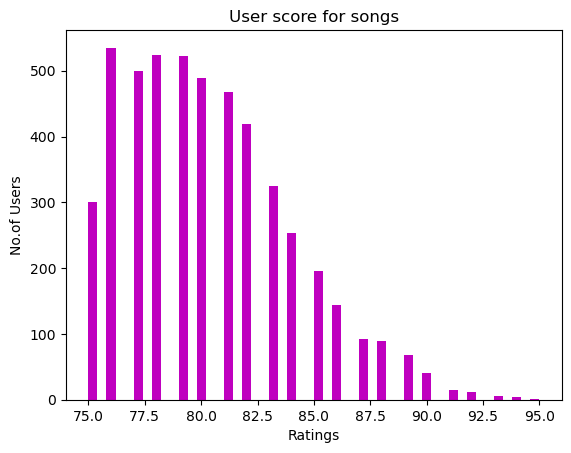

In [17]:
plt.hist(df['user_score'],bins=50,color='m')
plt.title('User score for songs')
plt.xlabel('Ratings')
plt.ylabel('No.of Users')
plt.show()

In [23]:
artist_count = df['artist'].value_counts().reset_index().head(10)
artist_count

,artist,count
0,King Gizzard & The Lizard Wizard,15
1,Miles Davis,14
2,David Bowie,14
3,Tom Waits,14
4,Bob Dylan,13
5,Swans,11
6,The Beatles,10
7,R.E.M.,10
8,Xiu Xiu,10
9,Aphex Twin,10


In [ ]:
year = df['release_date']

numpy.ndarray

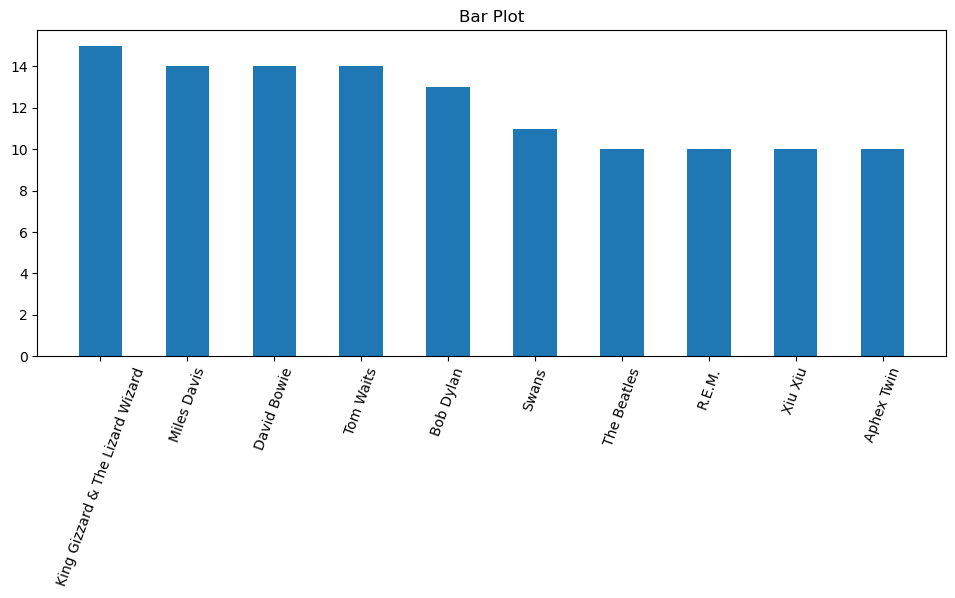

In [49]:
plt.figure(figsize = (10,4))
plt.bar(x = artist_count['artist'],height = artist_count['count'], width = 0.5)
plt.title('Bar Plot')
plt.tight_layout()
plt.xticks(rotation = 70)
plt.show()


In [50]:
best_artist = df.groupby(['artist'])['user_score'].mean().reset_index().sort_values(by = ['user_score'], ascending = False).head(10)

In [51]:
best_artist.head()


,artist,user_score
1243,Madvillain,93.0
1329,Mingus,92.0
964,Jeff Buckley,92.0
1140,Lauryn Hill,91.0
800,Godspeed You Black Emperor!,91.0


C:\Users\cathy\AppData\Local\Temp\ipykernel_8408\3451545347.py:4: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cathy\AppData\Local\Temp\ipykernel_8408\3451545347.py:4: UserWarning: Glyph 23713 (\N{CJK UNIFIED IDEOGRAPH-5CA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cathy\AppData\Local\Temp\ipykernel_8408\3451545347.py:4: UserWarning: Glyph 26179 (\N{CJK UNIFIED IDEOGRAPH-6643}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

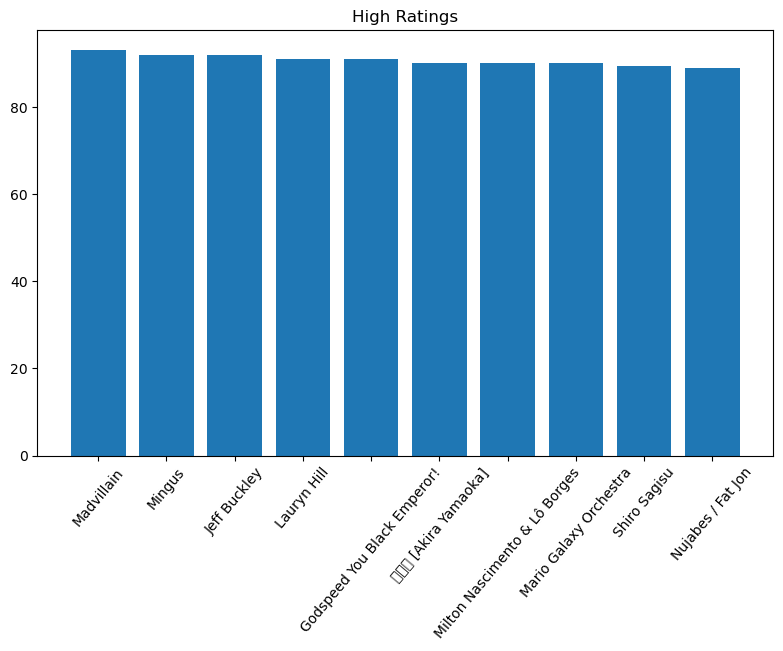

In [57]:
plt.figure(figsize = (8,5))
plt.bar(best_artist['artist'],best_artist['user_score'])
plt.title('High Ratings')
plt.tight_layout()
plt.xticks(rotation=50)
plt.show